# Diabetes prediction

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
import math

In [65]:
#load dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
data.shape

(768, 9)

In [67]:
#Splitting the dataset into feature set and target output

X = data.drop('Outcome', axis=1).values
Y = data['Outcome'].values

In [68]:
# splitting data into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=42, stratify=Y)

In [69]:
# Building Model using KNN classifier by using Sklearn
from sklearn.neighbors import KNeighborsClassifier
 
classifier = KNeighborsClassifier(n_neighbors=21)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [70]:
y_pred = classifier.predict(X_test)

In [71]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [72]:
# Evaluating the algorithm
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_pred, Y_test))
print(classification_report(y_pred, Y_test))

[[173  52]
 [ 28  55]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       225
           1       0.51      0.66      0.58        83

    accuracy                           0.74       308
   macro avg       0.69      0.72      0.70       308
weighted avg       0.77      0.74      0.75       308



In [73]:
# finding the correct value of K to find the accuracy

neighbors = np.arange(1,40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, Y_train)
    #compute training and test accuracy
    train_accuracy[i] = classifier.score(X_train, Y_train)
    test_accuracy[i] = classifier.score(X_test,Y_test)

print(train_accuracy)
print(test_accuracy)

[1.         0.85434783 0.84565217 0.80869565 0.78913043 0.78478261
 0.78695652 0.77826087 0.78695652 0.7673913  0.78043478 0.7673913
 0.77608696 0.77608696 0.7673913  0.76086957 0.7673913  0.77391304
 0.77608696 0.77173913 0.78695652 0.77173913 0.77608696 0.76956522
 0.76086957 0.76956522 0.75652174 0.76086957 0.76304348 0.76956522
 0.76521739 0.76086957 0.75869565 0.76521739 0.75869565 0.76304348
 0.76521739 0.76956522 0.76956522]
[0.67857143 0.69480519 0.68506494 0.70779221 0.7012987  0.72402597
 0.73051948 0.7012987  0.71428571 0.72077922 0.71428571 0.70779221
 0.70779221 0.73051948 0.73051948 0.73376623 0.72077922 0.73376623
 0.72402597 0.73376623 0.74025974 0.73701299 0.72402597 0.72727273
 0.71103896 0.72402597 0.71428571 0.72077922 0.71753247 0.72402597
 0.71428571 0.73376623 0.72077922 0.72727273 0.72727273 0.72077922
 0.71428571 0.71428571 0.71753247]


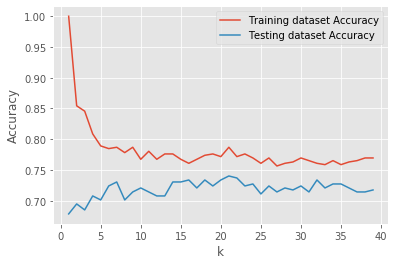

In [74]:
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')

plt.legend()
plt.xlabel('k') 
plt.ylabel('Accuracy')

plt.show()

In [75]:
# finding the best k value base on error rate (MSE (Mean square error))
k_neighbors = np.arange(1,40)
error_rate = []
for k in k_neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    error_rate.append(np.mean(y_pred != Y_test))

print(error_rate)

[0.32142857142857145, 0.3051948051948052, 0.31493506493506496, 0.2922077922077922, 0.2987012987012987, 0.275974025974026, 0.2694805194805195, 0.2987012987012987, 0.2857142857142857, 0.2792207792207792, 0.2857142857142857, 0.2922077922077922, 0.2922077922077922, 0.2694805194805195, 0.2694805194805195, 0.2662337662337662, 0.2792207792207792, 0.2662337662337662, 0.275974025974026, 0.2662337662337662, 0.2597402597402597, 0.262987012987013, 0.275974025974026, 0.2727272727272727, 0.288961038961039, 0.275974025974026, 0.2857142857142857, 0.2792207792207792, 0.2824675324675325, 0.275974025974026, 0.2857142857142857, 0.2662337662337662, 0.2792207792207792, 0.2727272727272727, 0.2727272727272727, 0.2792207792207792, 0.2857142857142857, 0.2857142857142857, 0.2824675324675325]


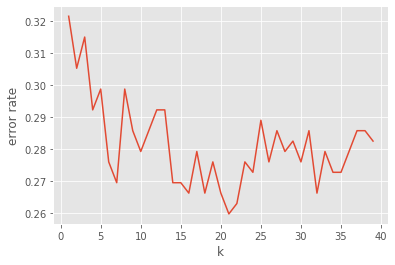

In [76]:
#plotting the error rate against the k values to find the best k value (where error rate is minimum)
plt.plot(k_neighbors, error_rate)
plt.title('Error')
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()